
# Computational Social Science Project #3 

*Group number:* 4

*Group members:*   
* Peter Amerkhanian
* Betsy Pleasants
* Alagia Cirolia
* Flavia Leite


*Semester:* Fall 2022

**1: INTRO from project instructions:**

In this project, you will learn how to develop machine learning models for classification problems. You will be working with data drawn from the City of
Chicago’s Open Data Portal. Specifically, you will develop models to predict
whether a business passes or fails a food inspection. Food safety is a major concern for city governments, and most regularly conduct food safety inspections
to ensure that establishments maintain adequate safety standards. However,
municipal governments have limited resources and cannot audit every establishment.

You have been tasked with developing an algorithm that will help the Department of Public Health prioritize establishments to audit. You have been
provided with a dataset that combines various open data sets curated by the
City of Chicago as part of a program to improve food inspection auditing. Your
goal is to predict the Results column using features taken from datasets covering business information, previous inspection results, and neighborhood information.

In [ ]:
#### Colab instructions
# Everyone needs to run this cell in order to connect colab and gdrive to read their data in

#from google.colab import drive 
#drive.mount ('/content/gdrive/', force_remount=True)

In [1]:
### Everyone run this cell to import what's needed

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

%matplotlib inline
# Make sure to import other libraries that will be necessary for training models!

import os as os
#For linking gdrive and notebook to import data

In [2]:
# Inspections Data 2011 - 2013
# chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              # low_memory=False)
chicago_inspections_2011_to_2013 = pd.read_csv("https://raw.githubusercontent.com/dlab-berkeley/Computational-Social-Science-Training-Program/main/Projects/Project%203/data/Chicago%20Inspections%202011-2013.csv",
                                               low_memory=False)

# Inspections Data 2014
# chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014.csv", 
                                      # low_memory=False)
chicago_inspections_2014 = pd.read_csv("https://raw.githubusercontent.com/dlab-berkeley/Computational-Social-Science-Training-Program/main/Projects/Project%203/data/Chicago%20Inspections%202014.csv", 
                                      low_memory=False)

In [3]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

## 2: Visualization (Alagia)

In [7]:
# Check the target value distribution
chicago_inspections_2011_to_2013['Results'].value_counts(normalize=True)

Pass                  0.678509
Fail                  0.200656
Pass w/ Conditions    0.120835
Name: Results, dtype: float64

What do inspections look like over time?

<AxesSubplot:title={'center':'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

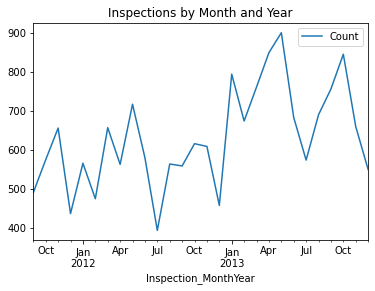

In [8]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

**Answer**:

Inspections seem to overall increase over time. Based on the graph, inspections peaked in 2012 around April-March. In 2013, inspections peak again around April-March, but there are approximately 200 more inspections at this peak than in 2012. Relatedly, the lowest number of inspections in 2012 occurred in July, and in July 2013 there were 200 more inspections than in July 2012.

What do the results look like?



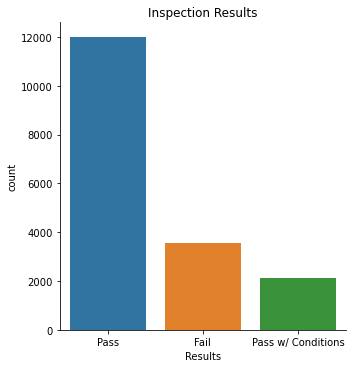

In [9]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

**Answer**:

Overall between 2011 and 2013, the large majority of inspections passed. A smaller group of inspections failed, and an even smaller group passed with conditions, but these two groups are both comparatively small to passes. 

What if we separate by facility type?

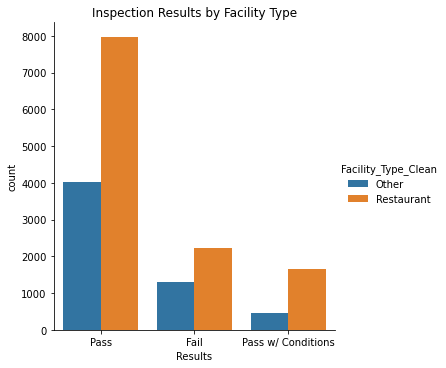

In [10]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

**Answer**: In comparing restaurants to other types of facilities by count of inspections and category of outcome, many more restaurant inspections are occurring compared to other types of facilities. Based on the visualization, it seems like restaurants and other types of facilities have similar distributions of pass, fail, and pass with conditions results.

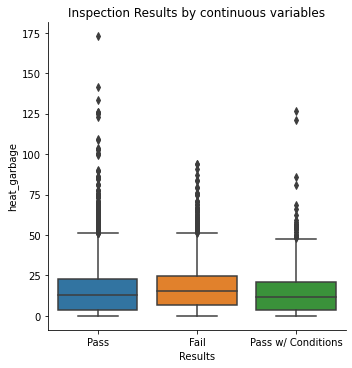

In [11]:
### Alagia: An additional type of visualization to play around with.

sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           y = 'heat_garbage',
           kind = 'box')

plt.title("Inspection Results by continuous variables")
plt.show()

## 3: Preprocess Data (Alagia)

From project instructions:

The “Chicago Inspections 2011-2013.csv” dataset contains data taken from eight
different datasets. The task of merging these datasets together has already
been done for you. We have also provided some preliminary visualizations and
dropped out several features. You may still wish to examine the dataset and
drop any other features you believe will not be helpful. Also, make sure to
examine the target variable and determine whether you wish to keep it as three
possible categories, or if it should be recoded.

In [12]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [13]:
# Set target variable 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
#recode target variable so it's 2 (rather than 3) classes, combining pass w/ conditions and pass into one group 
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

In [14]:
X.shape

(15311, 2042)

You may still wish to examine the dataset and drop any other features you believe will not be helpful. 

In [15]:
#Examine dataset and decide which features to drop
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

In [16]:
#drop features
X = X.drop(columns = ['precipIntensity', 'windSpeed'])

In [17]:
X.shape

(15311, 2040)

Also, make sure to examine the target variable and determine whether you wish to keep it as three possible categories, or if it should be recoded.

NOTE: We recoded the outcome above, combining "pass" and "pass with conditions" into one group. This will make prediction easier, though possibly less precise. This will also allow us to use more classification approaches. 

## 4: Fit Models

**Splitting from project instructions:**

* You may either split your data into train/validation sets, or use cross-validation.
Note, if you use train/validation sets, do not create a test set (you will see why
soon).

* Choose 3 different machine learning techniques. See available ones in the
scikit-learn documentation

* Detail the basic logic and assumptions underlying each model, its
pros/cons, and why it is a plausible choice for this problem.
Then, train your models (again either on the train set or using cross validation). Remember to use hyperparameter tuning.


**Fitting project instructions:**

First, do the following:
* Choose 3 different machine learning techniques. See available ones in the scikit-learn documentation

* Detail the basic logic and assumptions underlying each model, its
pros/cons, and why it is a plausible choice for this problem.
Then, train your models (again either on the train set or using cross validation). Remember to use hyperparameter tuning.

**Split Data**

We are choosing to use cross validation rather than a train/validate split to use all of the data we have for this training process, since we'll be using this model for prediction with an external data set. 

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

### Model 1: SVM (Betsy)

**SVM**

**Model 1 basic logic and underlying assumptions:** 

SVM is a  non-parametric method that looks for the "best separating hyperplane" between two classes. This is an extension of the support vector classifier that uses a kernel to enlarge the feature space, effectively allowing for a non-linear boundary between the two classes. SVM does not perfectly separate the classes, rather it allows some points to be within the margin or violate the boundary; this creates better classification of most of the training data. Only observations that are in the margin or on the wrong side of the margin affected the classifier, making it robust to individual observations that are far from the hyperplane. 

**Model 1 pros/cons:**

Pros: As stated, SVM tends to create better classifcation of most of the training data than "classical approaches" to classification. SVM is also more robust to individual observations that are far from the hyperplane, meaning this classification approach is not sensitive to outliers. 

Cons: SVM is a classification approach that can be used when there are two classes but this approach does not lend itself to instances where there are more than two classes, though there are approaches than can be used to overcome this limitation (one vs one and one vs all classification). 

**Why is it a plausible choice for this problem?**

SVM is a plausible approach, as we are interested in classifying establishments into two classes of food safety inspection results: Pass or Fail. It is plausible that there is a non-linear hyperplane between these classes and that the robustness of this classification approach will be beneficial, making this a reasonable choice for this problem. 

In [18]:
# Initiate scaler
sc = StandardScaler()

unscaled_x = X
# Standardize the dataset
X = pd.DataFrame(sc.fit_transform(X),index=X.index, columns=X.columns)

# Summary statistics after standardization
round(X.describe().T, 5)

,count,mean,std,min,25%,50%,75%,max
criticalCount,15311.0,-0.0,1.00003,-0.35108,-0.35108,-0.35108,-0.35108,12.24191
seriousCount,15311.0,0.0,1.00003,-0.52608,-0.52608,-0.52608,0.94404,6.82450
minorCount,15311.0,-0.0,1.00003,-1.85434,-0.86141,0.13152,0.62798,5.09616
pastFail,15311.0,0.0,1.00003,-0.28093,-0.28093,-0.28093,-0.28093,3.55957
pastCritical,15311.0,0.0,1.00003,-0.20594,-0.20594,-0.20594,-0.20594,16.62618
...,...,...,...,...,...,...,...,...
LICENSE_DESCRIPTION_Wrigley Field,15311.0,-0.0,1.00003,-0.04044,-0.04044,-0.04044,-0.04044,24.72731
APPLICATION_TYPE_C_EXPA,15311.0,0.0,1.00003,-0.03617,-0.03617,-0.03617,-0.03617,27.65050
APPLICATION_TYPE_C_LOC,15311.0,0.0,1.00003,-0.04855,-0.04855,-0.04855,-0.04855,20.59868
APPLICATION_TYPE_ISSUE,15311.0,0.0,1.00003,-0.38158,-0.38158,-0.38158,-0.38158,2.62067


In [19]:
# Summary statistics before standardization
unscaled_x.describe().T

,count,mean,std,min,25%,50%,75%,max
criticalCount,15311.0,0.195154,0.555883,0.0,0.0,0.0,0.0,7.0
seriousCount,15311.0,0.357847,0.680241,0.0,0.0,0.0,1.0,5.0
minorCount,15311.0,3.735092,2.014311,0.0,2.0,4.0,5.0,14.0
pastFail,15311.0,0.073150,0.260391,0.0,0.0,0.0,0.0,1.0
pastCritical,15311.0,0.073411,0.356473,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...
LICENSE_DESCRIPTION_Wrigley Field,15311.0,0.001633,0.040376,0.0,0.0,0.0,0.0,1.0
APPLICATION_TYPE_C_EXPA,15311.0,0.001306,0.036120,0.0,0.0,0.0,0.0,1.0
APPLICATION_TYPE_C_LOC,15311.0,0.002351,0.048434,0.0,0.0,0.0,0.0,1.0
APPLICATION_TYPE_ISSUE,15311.0,0.127098,0.333094,0.0,0.0,0.0,0.0,1.0


In [20]:
# Check default values
svc = SVC()
params = svc.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


In [21]:
# create the model with defined hyperparamteres based on tuning
svm = SVC(C=10, gamma='auto')

#fit the model
svm_classifier = svm.fit(X, y.ravel())

The code below was used to determine the best hyperparameters for this model, but takes a very long time to run so we are commenting it out for this assignment. The cell above fits the model using the hyperparameters found using the hyperparameter grid specified below. 

In [ ]:
# List of C values
C_range = np.logspace(-1, 1, 3)
print(f'The list of values for C are {C_range}')

# List of gamma values
gamma_range = np.logspace(-1, 1, 3)
print(f'The list of values for gamma are {gamma_range}')


The list of values for C are [ 0.1  1.  10. ]
The list of values for gamma are [ 0.1  1.  10. ]


In [ ]:
# Define the search space
#param_grid = { 
#    # Regularization parameter.
#    "C": C_range,
    # Kernel type
   # "kernel": ['rbf', 'poly'], #rbf generally performs best, so not tuning for this
    # Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
#    "gamma": gamma_range.tolist()+['scale', 'auto']}

# Set up the k-fold cross-validation
#kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [ ]:
# Define grid search
# This takes a really long time to run, so commenting out here (see output below and for next cell with determined hyperparameters)
#grid_search = GridSearchCV(estimator=svc, 
#                           param_grid=param_grid, 
#                           refit=True, 
#                           n_jobs=-1, 
#                           cv=kfold, 
#                           verbose=2)
# Fit grid search
#svm_grid_fit = grid_search.fit(X, y.ravel())
# Print grid search summary
#svm_grid_fit

Output: 

Fitting 5 folds for each of 15 candidates, totalling 75 fits

[CV] END ........................C=0.1, gamma=0.1; total time=29.1min

[CV] END ........................C=0.1, gamma=10.0; total time=33.5min

[CV] END ........................C=0.1, gamma=scale; total time= 6.1min

[CV] END ........................C=1.0, gamma=0.1; total time=24.1min

[CV] END ........................C=1.0, gamma=1.0; total time=26.8min

[CV] END ........................C=1.0, gamma=auto; total time= 5.2min

[CV] END ........................C=10.0, gamma=0.1; total time=59.8min

[CV] END ........................C=10.0, gamma=10.0; total time=55.0min

[CV] END ........................C=0.1, gamma=1.0; total time=31.2min

[CV] END ........................C=0.1, gamma=10.0; total time=33.6min

[CV] END ........................C=0.1, gamma=auto; total time= 6.2min

[CV] END ........................C=1.0, gamma=0.1; total time=24.1min

[CV] END ........................C=1.0, gamma=10.0; total time=24.6min

[CV] END ........................C=1.0, gamma=auto; total time= 5.3min

[CV] END ........................C=10.0, gamma=0.1; total time=59.9min

[CV] END ........................C=10.0, gamma=10.0; total time=55.0min


In [ ]:
#Find best hyperparameters
#With the above hyperparameter tuning commented out, also removing this

# print best parameter after tuning
#print(svm_grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
#print(svm_grid.best_estimator_)

#print(svm_grid.cv_results_["params"][best_index])
#print('Best CV R^2:', max(svm_grid_reg.cv_results_["mean_test_score"]))

**Best hyperparameters:**

SVC(C=10.0, gamma='auto')

**R squared values for best fit model**

Best CV R^2: 0.8786494714842009

In [ ]:
#Fit/train Model 1 with best hyperparameters
#do we need this since we're not predicting on this dataset? 

#best_svm_classifier = svm_grid_reg.best_estimator_.predict(X)
#best_svm_classifier

## Model 2: Random Forest (Flavia)

**Random Forest**

**Model 2 basic logic and underlying assumptions:**

Similarly to Bagging, Random Forests is an emsemble method that combines bootstrap to decision trees in order to deal with the issue of high variance. In both Bagging and Random Forests we take trainig sets of the population, create prediction models from these subsets and then average the predicitons of each model to obtain a low-variance statistical learning model. The difference between these two models lies on how we create each subtree. Unlike bagging, each subtree in Random Forests considers a random sample of predictors from the full set of predictors, so that predictions from the sub-models have less correlation. As with bagging, Random Forests lead to less concerns about overfitting as we consider the average or use majority voting in the models. This method can be used both for classification and regressions problems.

**Model 2 pros/cons:**

Pros: compared to simple decision trees, Random Forests result in higher predictive accuracy, eliminating overfitting. Compared to Bagging, Random Forests have the advantage of generating uncorrelated decision trees, which can produce an even larger reduction in variance. 

Cons: compared to simple decision trees, Random Forests are more difficult to interpret (ex. unclear which variables are the most important ones). Depending on the number of subsets from the population, this method can be computationally expensive.


**Why is it a plausible choice for this problem?**

Random Forest is a plausible approach, as we are interested in classifying establishments into two classes of food safety inspection results: Pass or Fail. 

**Approach 1:** Using the best hyperparameters found in hypterparameter tuning (approach 2, below, which takes a long time to run)

In [25]:
# Initialize a random forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(criterion='gini',  # or 'entropy' for information gain
                       max_depth=51,  # how deep tree nodes can go
                       min_samples_split=5,  # samples needed to split node
                       max_features=None,  # number of features to look for when splitting
                       n_estimators=151)

In [ ]:
# Ravel the target
#scores = cross_val_score(rf_classifier, X, y.ravel(), cv=5, )

In [ ]:
#scores.mean()

In [ ]:
rf_classifier.fit(X, y.ravel())

RandomForestClassifier(max_depth=51, max_features=None, min_samples_split=5,
                       n_estimators=151)

In [ ]:
# checking the oob score
#rf_classifier.oob_score_



**Approach 2:** Exhaustive grid search for hyperparameter selection

This takes a long time to run!

In [ ]:
#hyperparameter tuning for Random Forest using GridSearchCV
#rf_classifier = RandomForestClassifier()

In [ ]:
#We have 4623 obs
#params = {
    #'max_depth': np.hstack([np.arange(1, 200, 50), np.array([None])]),
    #'min_samples_split': [2, 5, 10],
    #'n_estimators': np.arange(1, 200, 50),
    #'max_features': ['auto', 'sqrt', None],}

In [ ]:
# Instantiate the grid search model
#grid_search = GridSearchCV(estimator=rf_classifier,
                           #param_grid=params,
                           #cv = 5,
                          # verbose=1, scoring="accuracy")

In [ ]:
#grid_search.fit(X, y.ravel())

In [ ]:
#grid_search.best_score_

In [ ]:
#best_rf_classifier = grid_search.best_estimator_
#best_rf_classifier

**Best hyperparameters**

RandomForestClassifier(max_depth=51, max_features=None, min_samples_split=5, n_estimators=151)

## Model 3: Boosting (Peter) - AdaBoost

**Boosting**

**Model 3 basic logic and underlying assumptions:**  
Boosting is a class of ensemble method. Ensemble methods generally address the bias-variance tradeoff issues of single decision trees by aggregating the results of many individual trees, or, "weak learners," together. Variance decreases when observations (in this case model outputs) are averaged: $\sigma^2>\frac{\sigma^2}{n}\ if\ n\ >1$. Boosting is specifically a *sequential ensemble* - model's performance sequentially increases as it trains more indvidual "weak learners."
   
The following is the algorithm for Gradient Boost and Ada Boost:  
- Define the final ensemble’s prediction, $\hat{f}\left(x\right)$ as 0. Then repeat the following steps:  
1. Fit a decision tree to the data, multiply predictions by a shrinking parameter $\lambda$, add those to $\hat{f}\left(x\right)$  
2. Find the residuals of those predictions  
3. Fit a new model on those residuals. The basic idea is that the ensemble’s fitting process focuses on predictions that it previously got wrong. **AdaBoost applies more weight to predictions that have been repeatedly wrong in the fitting process.**

By fitting each individual tree, or, "weak learner," on the residuals of the previous tree, as the model sequentially learn from previous mistakes.

**Model 3 pros/cons:**  

Pros:  
- High predictive accuracy  

Cons:  
- Time intensive training process, especially with hyper-parameter tuning
- Relatively less interpretable 

**Why is it a plausible choice for this problem?**  
Given that our prediction problem involves binary classification and that Boosting typically performs well on such problems, especially on data with many features, this seems plausible.

In [ ]:
#param_grid = {'n_estimators': np.arange(1, 200, 50),
#              'learning_rate': np.arange(0.1, 1, .1)}
#clf = AdaBoostClassifier()

In [ ]:
#grid_clf = GridSearchCV(clf, param_grid, cv=5, verbose=False)

In [ ]:
#grid_clf.fit(X, np.ravel(y))

**Top Performer:**

In [ ]:
#pd.DataFrame(grid_clf.cv_results_).iloc[0, 6:]

Note: top performer was `AdaBoostClassifier(n_estimators = 1, learning_rate = 1)`

**Note - Given the computation time required to grid search with ADA boost, we are hardcoding the best model, which we found from running grid search locally.**

In [22]:
ada_classifier = AdaBoostClassifier(n_estimators = 1, learning_rate = 1)
ada_classifier.fit(X, np.ravel(y))

AdaBoostClassifier(learning_rate=1, n_estimators=1)

## Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

From project instructions:

How well did your model do? Report the following:
* Accuracy
* Recall
* Precision
* F1 Score

In [26]:
#define each of these metrics for the "best" version of all three models
for clf, label in zip([svm_classifier, rf_classifier, ada_classifier],
                      ['SVM', 'Random Forest', 'Ada Boost']):
         accuracy_score = cross_val_score(clf, X, y.ravel(), scoring='accuracy', cv=5)
         recall_score = cross_val_score(clf, X, y.ravel(), scoring='recall', cv=5)
         precision_score = cross_val_score(clf, X, y.ravel(), scoring='precision', cv=5)
         f1_score = cross_val_score(clf, X, y.ravel(), scoring='f1', cv=5)
         print('Accuracy: %0.40f [%s]' % (accuracy_score.mean(), label))
         print('Recall: %0.40f [%s]' % (recall_score.mean(), label))
         print('Precision: %0.40f [%s]' % (precision_score.mean(), label))
         print('F1: %0.40f [%s]' % (f1_score.mean(), label))

Accuracy: 0.8769515335797161137421085186360869556665 [SVM]
Recall: 0.6647285906856958970223558935686014592648 [SVM]
Precision: 0.7071268948811118004726949948235414922237 [SVM]
F1: 0.6848361672097578178863841458223760128021 [SVM]
Accuracy: 0.9219516007517294386985895471298135817051 [Random Forest]
Recall: 0.8814574121571651099671385054534766823053 [Random Forest]
Precision: 0.7680309567145952032163336298253852874041 [Random Forest]
F1: 0.8214309056561994726308739700471051037312 [Random Forest]
Accuracy: 0.9218861986675204178709464031271636486053 [Ada Boost]
Recall: 0.9565975882886709191765817195118870586157 [Ada Boost]
Precision: 0.7359607860700776438278580826590768992901 [Ada Boost]
F1: 0.8315568279494038872456940225674770772457 [Ada Boost]


**Which of these metrics would you want to prioritize when conducting predictive auditing in this context? Why?**

0=Pass (Negative)

1=Fail (Positive)

**Accuracy** measures are not a good indicator of the performance of these models, given that our dataset is not balanced for the outcome measure. This inflates our accuracy, since most of our data are passes, which is reflected in the accuracy measures being very similar across all of the models (~0.92). 

**Recall** is a measure of how many how many of the fails (positives) were correctly predicted as failed (positive)--penalizing false pass predictions (detecting a fail if there was not a fail). This assesses how many of the real positives in the data we were able to effectively capture in our predictions. This metric is helpful for prioritizing approaches for the efficient use of resources for prevention. 

**Precision** is a measure of how often fails (positives) are correctly predicted (TP/(TP+FP)). This assesses how well calibrated the predictions are. This metric is an effective assessment of the risks posed to public health incorrectly passed assessments (false positives). 

Given that the classification we're interested in is a pass/fail related to food safety, we would prefer to have more false positives than false negatives. Incorrectly classified fails (false positives) pose a substantial risk to health and public safety, whereas false positives penalizes establishments who then have the opportunity to seek out a pass in a later inspection. 

With this in mind, we are choosing to prioritize model F1 scores (the harmonic mean of precision and recall) 

The F1 measures across our models were: 

*   SVM: 0.68
*   Random forest: 0.82
*   AdaBoost: 0.83

Based on these F1 scores, we will use **Adaptive Boosting** as our modeling approach for this relationship. 



## Policy Simulation

### Interpretable Machine Learning

From project instructions:

Use tools like coefficient plots or feature importance plots to investigate your
models. Which features contribute to your predictions? Are there any additional
features you wish you could incorporate?

**Hint**: Use tools like feature importance plots and coefficient plots

In [27]:
importances = ada_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in ada_classifier.estimators_], axis=0)

In [28]:
importance_res = pd.DataFrame([pd.Series(importances, name="imp"), pd.Series(std, name="std")]).T
importance_res.index = X.columns
importance_res = importance_res.sort_values(by="imp", ascending=False)
importance_res

,imp,std
seriousCount,1.0,0.0
WARD_PRECINCT_40-22,0.0,0.0
WARD_PRECINCT_4-15,0.0,0.0
WARD_PRECINCT_4-14,0.0,0.0
WARD_PRECINCT_4-12,0.0,0.0
...,...,...
WARD_PRECINCT_21-36,0.0,0.0
WARD_PRECINCT_21-34,0.0,0.0
WARD_PRECINCT_21-31,0.0,0.0
WARD_PRECINCT_21-3,0.0,0.0


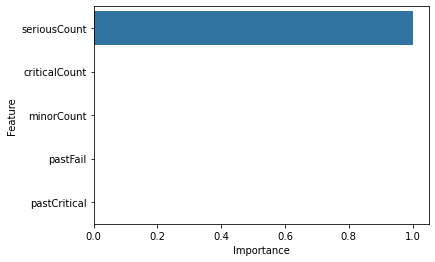

In [29]:
#Using features plot to investigate the best model
# Refit the random forest on the whole dataset to get feature importances
# ada_classifier.fit(X, y.ravel())
import seaborn as sns

feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(ada_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(5, 'Importance'))
plt.show()

**Which features contribute to our predictions?Are there any additional features we wish to incoporate?**

The results of the adaptive boosting model reveal that 'passing' or ‘failing’ an inspection is primarily related to finding a serious violation in the establishment during the visit. Other features such as finding a critical or finding a minor violation were not as important.  We decided not to incorporate other features to our model and follow the results of the AdaBoost model, as this algorithm already estimates how much contribution each single feature does to the tree.

## Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

From project instructions:

Imagine that the City of Chicago only had resources to conduct 1000 food
safety inspections. Generate a list of the 1000 riskiest establishments. Using
your chosen metric, demonstrate how well your algorithm prioritized finding
potential violations.
Then, conduct a simulation where you choose 1000 establishments to randomly audit. Again using your chosen metric, how well did random audits do?
How did random auditing compare to predictive auditing?

**Considering the 1000 riskiest establishments**

1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
2. Order your audits by their probability of detecting a "Fail" score

In [30]:
#Final Code:
eval_X = X.copy()
prob = ada_classifier.predict_proba(eval_X)[:, -1]
pred = ada_classifier.predict(eval_X)
eval_X['predicted']= pred
eval_X['ada_pred_prob'] = prob.tolist()
top1000 = eval_X.sort_values(by="ada_pred_prob", ascending=False)[['ada_pred_prob','predicted']].head(1000)
top1000


,,ada_pred_prob,predicted
Inspection_ID,DBA_Name,,
1188493,CITGO SUBWAY,0.735492,1
1155053,THE NEW VALOIS REST INC,0.735492,1
1326946,CHARLEY THAI PLACE INC,0.735492,1
1084412,CHICAGO WINGS,0.735492,1
1155040,CROWBAR LOUNGE,0.735492,1
...,...,...,...
679912,ROYAL SWEET & FAST FOOD & PIZZ,0.735492,1
1166397,CHALKBOARD,0.735492,1
679911,STARLITE CAFE,0.735492,1


In [31]:
top_with_results = pd.merge(
    top1000,
    chicago_inspections_2011_to_2013[['Results']],
    left_index=True,
    right_index=True)
top_with_results

,,ada_pred_prob,predicted,Results
Inspection_ID,DBA_Name,,,
1188493,CITGO SUBWAY,0.735492,1,Pass w/ Conditions
1155053,THE NEW VALOIS REST INC,0.735492,1,Fail
1326946,CHARLEY THAI PLACE INC,0.735492,1,Fail
1084412,CHICAGO WINGS,0.735492,1,Fail
1155040,CROWBAR LOUNGE,0.735492,1,Fail
...,...,...,...,...
679912,ROYAL SWEET & FAST FOOD & PIZZ,0.735492,1,Fail
1166397,CHALKBOARD,0.735492,1,Fail
679911,STARLITE CAFE,0.735492,1,Pass w/ Conditions


3. Plot your distribution of pass/fail among the first 1000 observations in the dataset

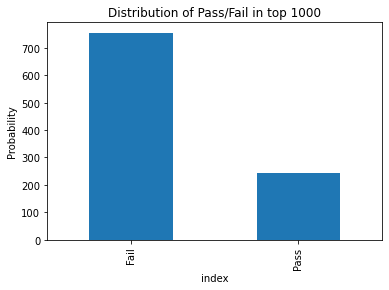

In [32]:
#chart
results_ = pd.DataFrame(top_with_results['Results'].value_counts()).reset_index()
results = results_.replace({'Pass w/ Conditions': 'Pass'}).groupby('index').sum()
results['Results'].plot(kind="bar")
plt.title("Distribution of Pass/Fail in top 1000")
plt.ylabel("Probability");

In [33]:
top_with_results['Results'] = top_with_results['Results'].replace({"Pass w/ Conditions": "Pass"})

In [34]:
top_with_results['Results']

Inspection_ID  DBA_Name                      
1188493        CITGO SUBWAY                      Pass
1155053        THE NEW VALOIS REST INC           Fail
1326946        CHARLEY THAI PLACE INC            Fail
1084412        CHICAGO WINGS                     Fail
1155040        CROWBAR LOUNGE                    Fail
                                                 ... 
679912         ROYAL SWEET & FAST FOOD & PIZZ    Fail
1166397        CHALKBOARD                        Fail
679911         STARLITE CAFE                     Pass
679905         7-ELEVEN                          Fail
1166395        EL NUEVO SOL DE MEXICO            Fail
Name: Results, Length: 1000, dtype: object

4. Using your chosen metric, demonstrate how well your algorithm prioritized finding potential violations.



In [35]:
#### Calculate F1

tp = top_with_results[(top_with_results['Results'] == 'Fail') & (top_with_results['predicted'] == 1)]
fp = top_with_results[(top_with_results['Results'] == 'Pass') & (top_with_results['predicted'] == 1)]
fn = top_with_results[(top_with_results['Results'] == 'Fail') & (top_with_results['predicted'] == 0)]
f1 = (
    (2*len(tp.index)) / 
    (2*len(tp.index) + len(fp.index) + len(fn.index))
)
print("F1 score with top 1000:", f1)

F1 score with top 1000: 0.8610478359908884


**Considering a random sample**

Then, conduct a simulation where you choose 1000 establishments to randomly audit. Again using your chosen metric, how well did random audits do? How did random auditing compare to predictive auditing?

In [43]:
#Choose 1000 establishments to randomly audit
random_1000 = chicago_inspections_2011_to_2013[['Results']].sample(1000,
                                                                   random_state = 7)
random_1000["Results"] = random_1000["Results"].replace({"Pass w/ Conditions": "Pass"})
random_1000_results = pd.DataFrame(
    random_1000['Results'].value_counts())

In [44]:
y_true = random_1000["Results"].replace({"Fail": 1, "Pass": 0}).astype(int).values
y_pred = np.ones(1000)

In [53]:
from sklearn.metrics import f1_score

In [54]:
print("F1 score with random 1000:", f1_score(y_true, y_pred))

F1 score with random 1000: 0.3429991714995857


**Again using your chosen metric, how well did random audits do? How did random auditing compare to predictive auditing?**

The F1 score of our simulation considering random audits was much lower (0.34) than the score of our simulation with predictive auditing (0.86). These results indicate that for the same number of audits, a targeted approach based on predicted failures of businesses at food inspections would be significantly more efficient to achieve the policy goal of detecting restaurants that do not maintain adequate safety standards.



### Predict on Data with Unseen Labels

From project instructions:

Use your favorite model to make predictions based on the features in “Chicago
Inspection 2014.csv”. Note that this dataset does not include a “Results”
column. After you make your predictions, choose a metric that you think makes
the most sense from a policy perspective and explain your choice. Then, save
your predictions in a file called “predictions.csv”. The instructor will check your
predictions against the observed labels on the metric you chose and report your
model performance back to you after you submit the assignment.

In [55]:
chicago_inspections_2014 = chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'])

In [56]:
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate'],
                                      axis = 1)

In [57]:
X_test = pd.get_dummies(chicago_inspections_2014)

In [58]:
X_test = chicago_inspections_2014[chicago_inspections_2011_to_2013.columns.intersection(chicago_inspections_2014.columns)]

In [59]:
X_test = pd.get_dummies(X_test).dropna()

In [60]:
for x_col in X.columns:
  if x_col not in X_test.columns:
    X_test[x_col] = 0
to_drop = []
for x_t_col in X_test.columns:
  if x_t_col not in X.columns:
    to_drop.append(x_t_col)

X_test = X_test.drop(to_drop, axis=1)

/var/folders/2j/q0n5tmtn1rj3s9fvkmm4k9sm0000gn/T/ipykernel_3265/2171268157.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[x_col] = 0


In [ ]:
# Fill in the code below with the X data you used for training
# X_test = chicago_inspections_2014[chicago_inspections_2014.columns & ....columns]

In [61]:
#Use your favorite model to make predictions based on the features in “Chicago Inspection 2014.csv
predictions_test = ada_classifier.predict(X_test)

In [62]:
pred_df = pd.DataFrame(predictions_test)
pred_df


,0
0,0
1,0
2,1
3,1
4,1
...,...
3932,0
3933,0
3934,0
3935,0


Choose a metric that makes the most sense from a policy perspective and explain your choice: 

In [63]:
pred_df.value_counts(normalize=True)

0    0.725679
1    0.274321
dtype: float64

In [64]:
chicago_inspections_2011_to_2013['Results'].value_counts(normalize=True)

Pass                  0.670041
Fail                  0.201620
Pass w/ Conditions    0.128339
Name: Results, dtype: float64

Note that while we cannot directly evaluate our results without labels - it does seem that the propostions of the failures is comparable to the data that we do have, so we feel pretty good about this.

In [65]:
pred_df.to_csv("predictions.csv")

In [ ]:
#Save predictions as "predictions.csv"

# Discussion Questions

**5.1 Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?**

As described above, accuracy as a metric for model performance is limited in instances where we have an imbalanced dataset (meaning there's not an equal split between outcome groups). This is particularly true when we have a binary outcome, such as the Pass/Fail in the project. In social science, public policy, and public health research, we are often working with imbalanced datasets, as with many of the outcomes that are uncommon or even very rare, and binary outcomes--for instance, with deaths, rare diseases, and severe health outcomes. These are instances where accuracy would provide an inflated assessment of predictive power for models as well sa limited information about classification for specific groups. 

In contrast, precision, recall, and F1 scores provide more specific information. With precision, we have an understanding of how well we are classifying positives, with recall, how well we are correctly classifying across groups, and with F1 score, an the balance of precision and recall. These will provide more meaningful metrics for classification in many of the instances where we are classifying for social science or policy purposes. 

**5.2 Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?**

While the modification of behavior to avoid detection of failing practices while maintaing unsafe food safety practices is problematic, there are important considerations in responding to this question. First, to our knowledge, food service establishments are already aware of the metrics used to evaluate their perfomance as they are required to comply with these practices to operate. Second, to our knowledge food safety audits have generally been carried out on a random basis to prevent establishments from preparing just to pass inspection (outside of the norm of their usual practicess). **And finally, in our exploration only one feature--counts of serious infractions--significantly predicted the pass/fail outcome.**

So the question here is really about first, shifting the way that auditing decisions are made, and then establishments becoming aware that **serious infractions** are the basis for this auditing (or if in future there was a different feature or set of features used, those) and therefore modifying just that behavior or set of behaviors. Shifting from a random assessment system to targeted assessment has the potential to save resources and target the particuarly dangerous establishments (in terms of risk of food bourne illness), but also poses a challenge for policy-makers, as they consider the interactions between algorithmic prediction and human behavior.

Notably, establishments seeking to reduce serious count infractions does not, in itself, seem like a negative outcome. Rather, changing those behaviors seems like a positive result in behavior change coming from using this type of auditing approach. The risk seems to be largely posed by the potential for establishments only changing these behaviors and ignoring others that still pose singificnat health risks. To address this, we propose integrative a random auditing approach with a predictive approach, ensuring that doing well on the feature with the most predictive power is not a gaurantee of evading a later audit. This is aligned with research focused on promoting fairness in auditing by sampling across distinct groups, as with political parties in Brazil in Ash et al (2021). While we would not be auditing equally across any group line, a random auditing approach would introduce some additional fairness while also address the prediction/behavior change interplay. 


References: 

Ash, Elliott and Galletta, Sergio and Giommoni, Tommaso, A Machine Learning Approach to Analyze and Support Anti-Corruption Policy (June 17, 2021). Available at SSRN: https://ssrn.com/abstract=3589545 or http://dx.doi.org/10.2139/ssrn.3589545
